<span style="color:#929591">Chapter 3.
# <span style="color:#820747">Flight Delays Prediction 2018. Regression Problem.

<img src="img/pl3.jpg">

<span style="color:#610023">In this part of my project, I will build model using LinearRegression, for the Air Traffic Controllers in USA which they can use after predicting if delay acure. This model will estimate exact length of delay, and how strong it is we will see as soon as I build it. Next chapter will be devoted to the same problem, but with classification solution. Where I will predicting intervals rather than continuous values. First step will be redo my categorical features, and focus not on number of delays but on length of delays.  

# <span style="color:#a83c09">Navigator:

<b>[Dictionary](img/dictionary.txt)

<b>[1. EDA](./Chapter-1-EDA.ipynb)

<b>[2. Delay. Prediction | Classification problem](./Chapter-2-features-creation-classification problem.ipynb)

<b>[4. Length Interval of Delay. Prediction | MultiClass Classification problem](./Chapter-4-classification_problem_timeinterval.ipynb)

<img src="img/lin.jpg">

# <span style="color:#a83c09">Chapter Structure:

A. <b>Null Values Dropping and Features Selection.</b><br>
         
B. <b>Outliers.</b><br>

C. <b>Tuning of Target and Predictors.</b><br>

         1. Target: Length of Delay on Arrival.
         2. Predictor: Day of the Week.
         3. Predictor: Airline Code.
         4. Predictor: Tail Number.
         5. Predictor: Flight Number.
         6. Predictor: Origin Airport.
         7. Predictor: State Origin.
         8. Predictor: State Destination.
         9. Predictor: Arrival Time.
         10. Predictor: Arrival Time.
         11. Predictor: Scheduled Length of Flight Time.
         12. Predictor: Distance of the Flight.
         
D. <b>Categorical Variables into Dummies.</b><br>

E. <b>Check for Multicollinearity.</b><br>

F. <b>Models Building.</b><br>

         1. Separation: Features and Target Splitting.
         2. Standardization: All data into same scale.
         3. Split: Train | Test.
         4. Model: LinearRegression.
            - Fit Best Parameters into my Model.
         5. Model: Ridge regression R2.
            - Find an optimal value for Ridge regression alpha using RidgeCV.
            - Cross-validate the Ridge Regression R2.
         6. Model: Lasso Regression.
            - Find an Optimal value for Lasso Regression Alpha using LassoCV.
            - Cross-validate the Lasso Regression.
         7. Model: Elastic Net Regression.
            - Find an optimal value for Elastic Net regression alpha using ElasticNetCV.
            - Cross-validate the ElasticNet R2
         8. Model: RandomForestRegressor.
            - GridSearch for RandomForestRegressor.
            - Fit Best Parameters into my Model.
         9. Conclusion.

<img src="img/lin.jpg">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> Loading libraries which I will use during third part of the project. I will use sklearn library as it provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. And it is very easy to use this library. Also I will load Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, and will try to find best values for them, and then R^2 scores using cross validation. 

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import itertools

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import datetime, warnings, scipy 

# <span style="color:#040273">Part A. Null Values Dropping and Features Selection

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> I am predicting flight delays on arrival. Also I want to know about possible delays before plane start moving from the gate in departure airport. In this case I can use only information which not related to how long plane was moving to runway or how long plane was in the air, etc.

In [119]:
# Load my dataset and check shape with columns name. 
# ________________________________________________________
df = pd.read_csv('1_full_file_ready_to_slice.csv', low_memory=False)
print('Number of records and columns: ',df.shape)
print('----------------------------------------------------------')
print('Columns: ',df.columns)

Number of records and columns:  (570007, 45)
----------------------------------------------------------
Columns:  Index(['Unnamed: 0', 'ID', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE_CODE', 'AIRLINE', 'TAIL_NUMBER', 'FLIGHT_NUMBER', 'DATE',
       'ORIGIN_AIRPORT', 'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN',
       'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'DESTINATION_AIRPORT',
       'AIRPORT_DESTINATION', 'CITY_DESTINATION', 'STATE_DESTINATION',
       'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON', 'DIVERTED',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'AIRLINE_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'],
      dtype='object')


In [120]:
# Dropping unneeded columns and check for null values
# ________________________________________________________
df.drop(['Unnamed: 0', 'ID', 'YEAR', 'MONTH', 'DAY', 'AIRLINE', 'CANCELLATION_REASON', 
         'DATE', 'AIRPORT_ORIGIN', 'LATITUDE_ORIGIN', 'LONGITUDE_ORIGIN', 'AIRPORT_DESTINATION',
         'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION', 'CITY_DESTINATION', 'DEPARTURE_TIME',
         'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'CANCELLED', 'CANCELLATION_REASON', 
         'DIVERTED', 'ELAPSED_TIME', 'AIR_TIME'], axis=1, inplace=True)

df.isnull().sum()

DAY_OF_WEEK                 0
AIRLINE_CODE                0
TAIL_NUMBER              1969
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
CITY_ORIGIN                 0
STATE_ORIGIN                0
DESTINATION_AIRPORT         0
STATE_DESTINATION           0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY         17332
TAXI_OUT                17072
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY           18626
SCHEDULED_TIME              0
DISTANCE                    0
AIRLINE_DELAY          472257
WEATHER_DELAY          472257
AIR_SYSTEM_DELAY       472257
SECURITY_DELAY         472257
LATE_AIRCRAFT_DELAY    472257
dtype: int64

In [123]:
# Fill all NaN's in features related to delays with '0'. Drop all nulls.
# ________________________________________________________
where_are_NaNs = isnan(df.AIRLINE_DELAY)
df.AIRLINE_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.WEATHER_DELAY)
df.WEATHER_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.AIR_SYSTEM_DELAY)
df.AIR_SYSTEM_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.SECURITY_DELAY)
df.SECURITY_DELAY[where_are_NaNs] = 0

where_are_NaNs = isnan(df.LATE_AIRCRAFT_DELAY)
df.LATE_AIRCRAFT_DELAY[where_are_NaNs] = 0


df = df.dropna()
print('---------------------------------------------------')
print('Number of records after NaNs droping: ',df.shape)
print('---------------------------------------------------')

---------------------------------------------------
Number of records after NaNs droping:  (550905, 21)
---------------------------------------------------


<img src="img/lin.jpg">

# <span style="color:#040273">Part B. Outliers.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> In this part I will show how many outliers I have on Arrival Delays. This type of delays could lead to inaccuracy of my model. This kind of delays are probably related to some events like (weather, breakdown, accident, e.t.c). Mean for all delays around <b>41 minutes</b>. I will desclude most of outliers on arrival, also I will count delay if it is more than 2 minutes. Interval will be <b>from 2 min to 120 min</b> everything else I will count as outliers. After removing outliers I will get <b>157948 records</b>, for my modeling.

In [124]:
# Choose delays on arrival from 2 min and above
# ________________________________________________________
df = df[df.ARRIVAL_DELAY >= 2]
df.shape

(170555, 21)

In [125]:
# Show how much right skewed my delays.
# ________________________________________________________
df.ARRIVAL_DELAY.describe()

count    170555.000000
mean         40.990935
std          72.650309
min           2.000000
25%           8.000000
50%          19.000000
75%          45.000000
max        2023.000000
Name: ARRIVAL_DELAY, dtype: float64

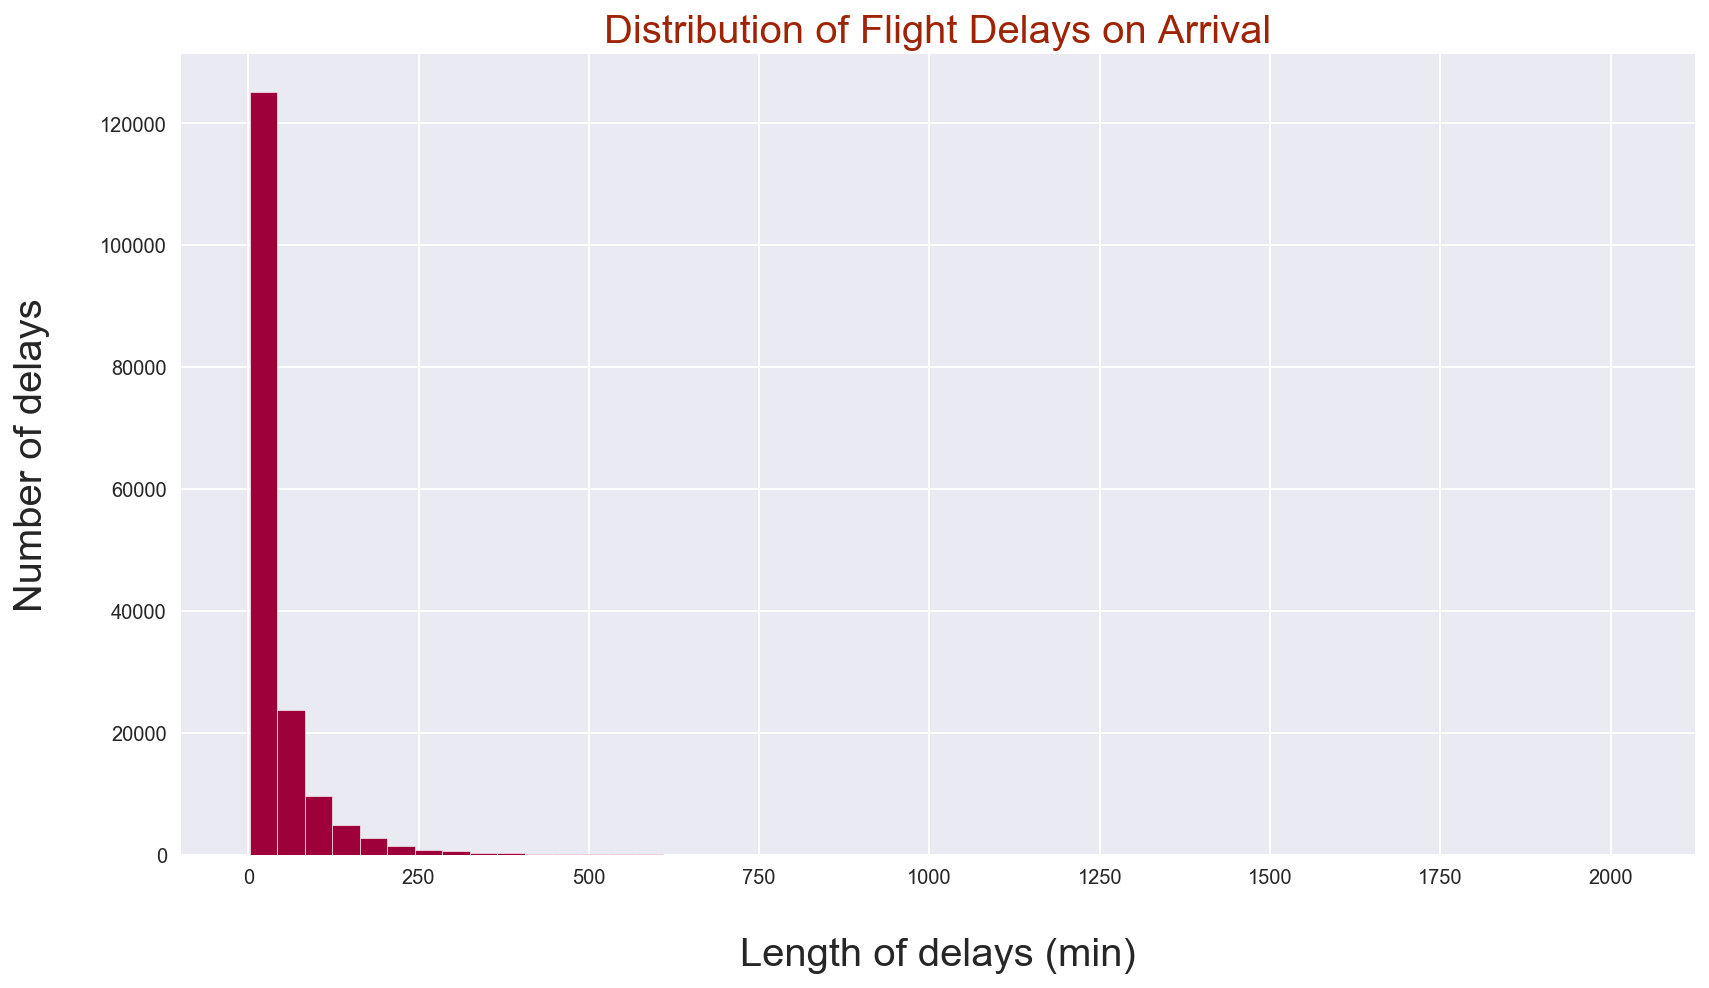

In [126]:
# As we can see there is very big right skewness.
# ________________________________________________________
fig, ax = plt.subplots(figsize=(12,7))
bar = df.ARRIVAL_DELAY.plot(kind='hist', bins=50, color= '#9e003a', histtype='bar', ec='w')
plt.title('Distribution of Flight Delays on Arrival', size = 20, color='#9f2305')
plt.xlabel('\nLength of delays (min)', size=20)
plt.ylabel('Number of delays\n', size=20)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
plt.tight_layout()
fig = bar.get_figure()

/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


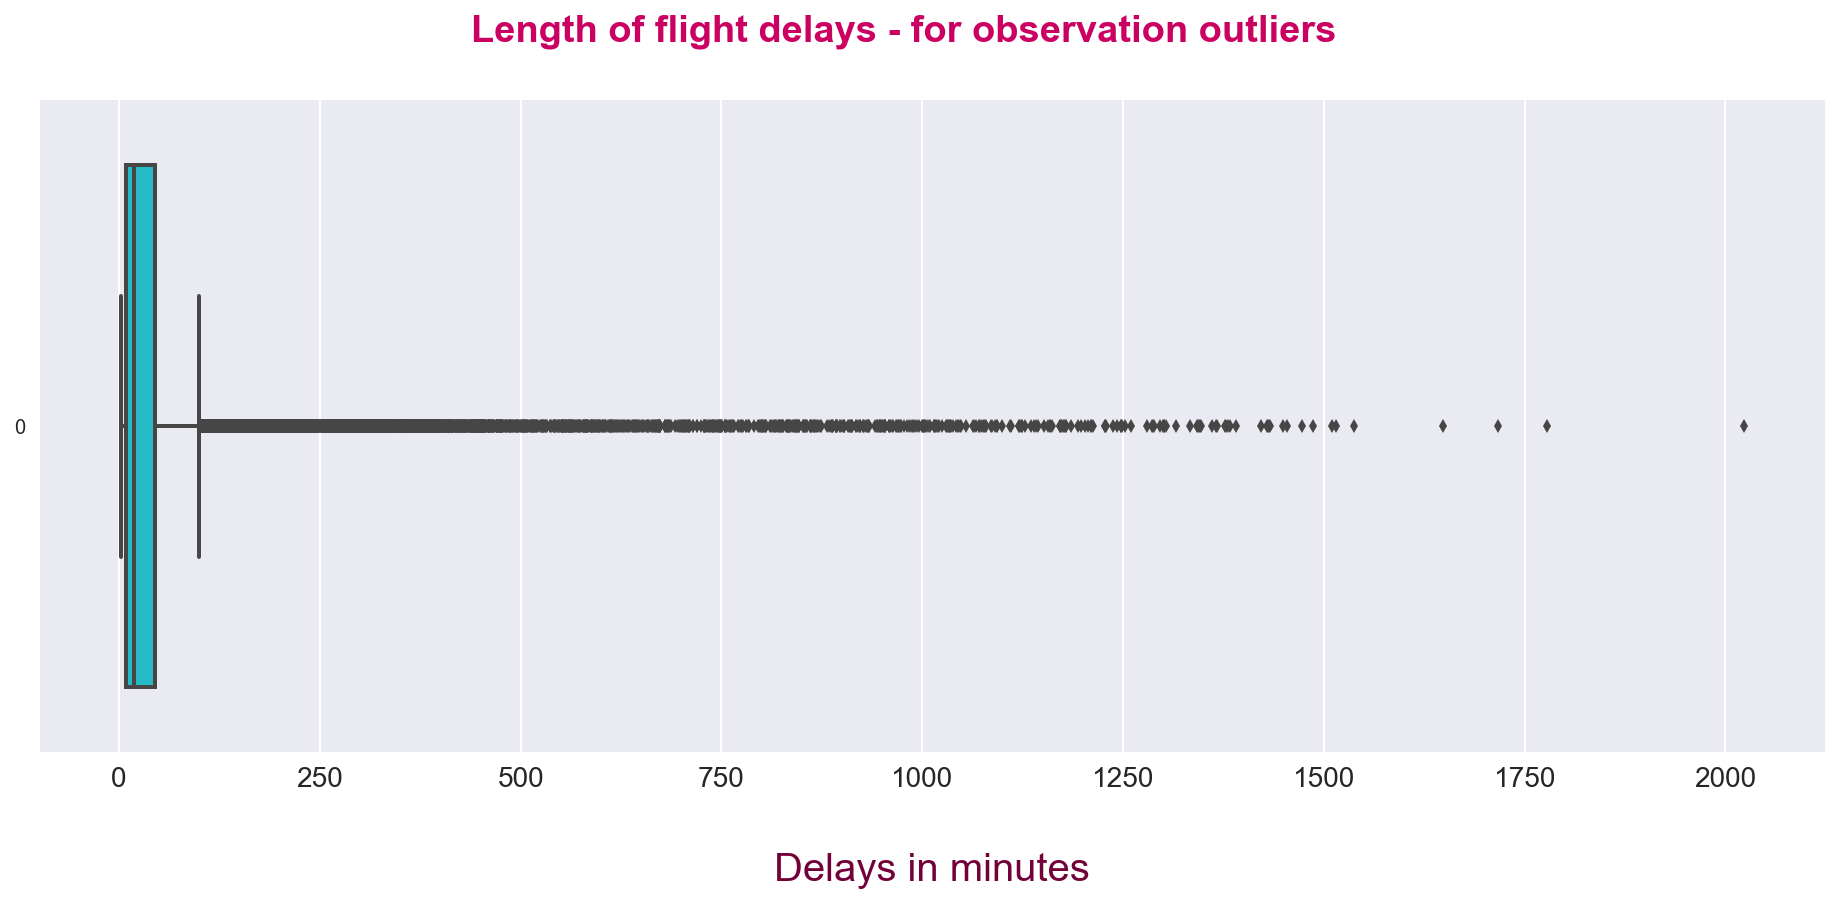

In [127]:
# Look at this outliers on box plot.
# ________________________________________________________
sns.set_style("darkgrid")
fig = plt.figure(1, figsize=(16,6))
ax = sns.boxplot(data=df.ARRIVAL_DELAY.values, orient='h', fliersize=5, linewidth=2, notch=False, saturation=0.7, color='#02d8e9')
plt.suptitle('Length of flight delays - for observation outliers', fontsize=19, color='#cb0162',  weight = 'bold')
plt.xlabel('Delays in minutes', fontsize=20, labelpad=30, color='#730039')
plt.xticks(fontsize=14)
plt.show()

In [128]:
# I will keep only delays up to 2 hrs. Removing outliers.
# ________________________________________________________
df = df[df.ARRIVAL_DELAY <= 120]
df.shape

(157948, 21)

/Anaconda/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


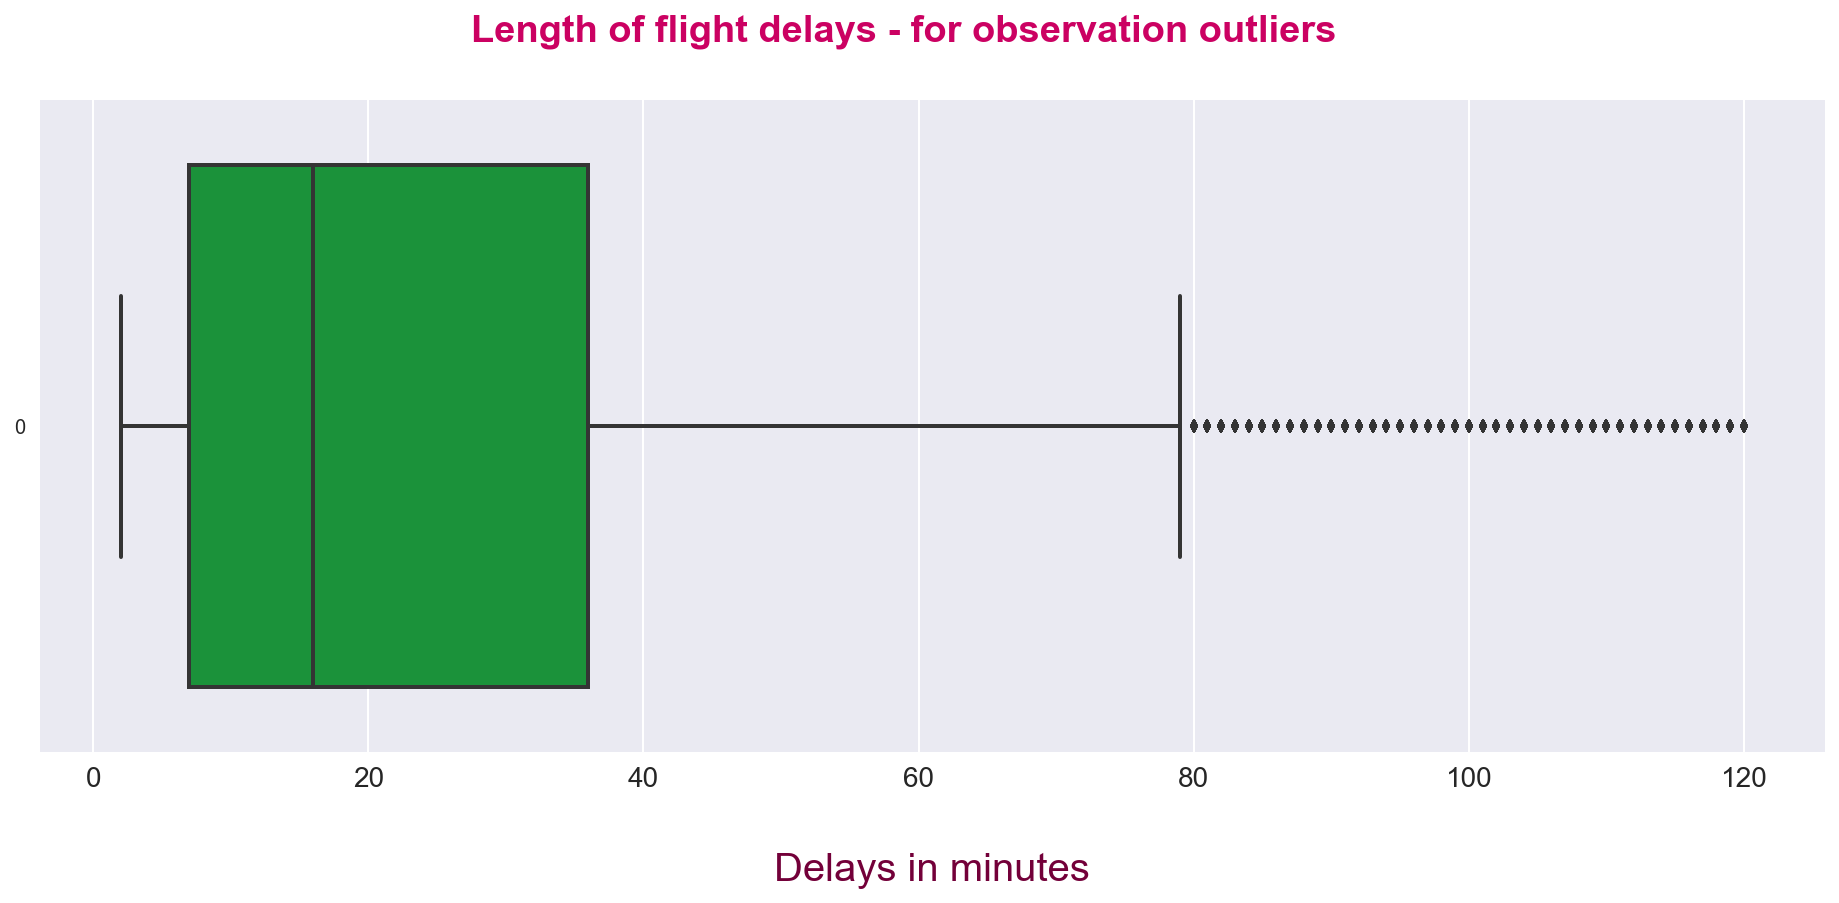

In [129]:
# My needed interval between 2 min and 120 minutes.
# ________________________________________________________
sns.set_style("darkgrid")
fig = plt.figure(1, figsize=(16,6))
ax = sns.boxplot(data=df.ARRIVAL_DELAY.values, orient='h', fliersize=5, linewidth=2, notch=False, saturation=0.7, color='#02ab2e')
plt.suptitle('Length of flight delays - for observation outliers', fontsize=19, color='#cb0162',  weight = 'bold')
plt.xlabel('Delays in minutes', fontsize=20, labelpad=30, color='#730039')
plt.xticks(fontsize=14)
plt.show()

<img src="img/lin.jpg">

# <span style="color:#040273">Part C. Tuning of Target and Predictors

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> In this part I will 1st create new column for my convenience where I store arrival delays values. 2nd I will create categorical variables again but this time they will be related to the mean of delay length. After that I will create dummy variables from categorical, which I will use in my regression model.

# <span style="color:#ffad01">1. Target: <span style="color:#004577">Length of Delay on Arrival.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> Store my target in a new column.

In [130]:
#Count delay from 2 min and above. Mean for arrival_delay is 2.8 min. I have 179305 delays on arrivals.
# ________________________________________________________
df['Arrival_delay_length'] = df['ARRIVAL_DELAY']
df.Arrival_delay_length = df.Arrival_delay_length.astype(int)

df.Arrival_delay_length.value_counts().head(5)

2    8177
3    7741
4    6936
5    6635
6    6186
Name: Arrival_delay_length, dtype: int64

<img src="img/lin.jpg">

# <span style="color:#ffad01">2. Predictor: <span style="color:#004577">Day of the Week.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I will count mean of length of delay for each day of the week and make 7 categories.

In [131]:
time_delays_by_day = df.pivot_table(index='DAY_OF_WEEK', values='Arrival_delay_length', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_day)
df_xxx.reset_index(level=0, inplace=True)
df_xxx

,DAY_OF_WEEK,Arrival_delay_length
0,1,28.237387
1,2,27.311503
2,3,26.011640
3,4,24.006217
4,5,27.059525
5,6,23.640680
6,7,25.333709


In [132]:
df_xxx['days_length_del'] =  df_xxx['Arrival_delay_length'].apply(lambda x: 1 if x > 23 and x <= 23.7 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 2 if x > 24 and x <= 25 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 3 if x > 25 and x <= 26 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 4 if x > 26 and x <= 27 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 5 if x > 27 and x <= 27.06 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 6 if x > 27.06 and x <= 28 else float(x))
df_xxx['days_length_del'] =  df_xxx['days_length_del'].apply(lambda x: 7 if x > 28 else float(x))

In [133]:
df = pd.merge(df,df_xxx, on=['DAY_OF_WEEK'])
df.drop('Arrival_delay_length_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">3. Predictor: <span style="color:#004577">Airline Code.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I count mean of length of delay for each airline then I make 4 intervals. I will split for for group based on describe() information max, min, mean values. I will follow same approach for rest of my categorical features.

In [134]:
time_delays_by_airline = df.pivot_table(index='AIRLINE_CODE', values='Arrival_delay_length_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_airline)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,AIRLINE_CODE,Arrival_delay_length_x
0,9E,32.251547
1,AA,23.882518
2,AS,19.064572
3,B6,32.979501
4,DL,27.067780


In [135]:
df_xxx.describe()

,Arrival_delay_length_x
count,18.000000
mean,26.344196
std,4.449376
min,15.355207
25%,24.497494
50%,26.513544
75%,29.024912
max,32.979501


In [136]:
df_xxx['airline_del_mean'] =  df_xxx['Arrival_delay_length_x'].apply(lambda x: 1 if x > 15 and x <= 20 else int(x))
df_xxx['airline_del_mean'] =  df_xxx['airline_del_mean'].apply(lambda x: 2 if x > 20 and x <= 26 else int(x))
df_xxx['airline_del_mean'] =  df_xxx['airline_del_mean'].apply(lambda x: 3 if x > 26 and x <= 30 else int(x))
df_xxx['airline_del_mean'] =  df_xxx['airline_del_mean'].apply(lambda x: 4 if x > 30 and x <= 33 else int(x))

In [137]:
df = pd.merge(df,df_xxx, on=['AIRLINE_CODE'])
df.drop('Arrival_delay_length_x_y', axis=1, inplace=True)

In [138]:
# Check my new collumns at the end of dataframe.
# ________________________________________________________
df.head(3)

,DAY_OF_WEEK,AIRLINE_CODE,TAIL_NUMBER,FLIGHT_NUMBER,ORIGIN_AIRPORT,CITY_ORIGIN,STATE_ORIGIN,DESTINATION_AIRPORT,STATE_DESTINATION,SCHEDULED_DEPARTURE,...,SCHEDULED_TIME,DISTANCE,AIRLINE_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Arrival_delay_length_x_x,days_length_del,airline_del_mean
0,1,EV,N614QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-08 09:43:00,...,92.0,383.0,0.0,0.0,0.0,0.0,61.0,61,7.0,4
1,1,EV,N615QX,2815,DFW,Dallas-Fort Worth,TX,BTR,LA,2018-01-22 07:15:00,...,78.0,383.0,0.0,0.0,0.0,0.0,0.0,12,7.0,4
2,1,EV,N615QX,2816,BTR,Baton Rouge,LA,DFW,TX,2018-01-15 06:37:00,...,94.0,383.0,0.0,0.0,0.0,0.0,0.0,9,7.0,4


<img src="img/lin.jpg">

# <span style="color:#ffad01">4. Predictor: <span style="color:#004577">Tail Number.

In [139]:
time_delays_by_tail = df.pivot_table(index='TAIL_NUMBER', values='Arrival_delay_length_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_tail)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,TAIL_NUMBER,Arrival_delay_length_x_x
0,215NV,31.400000
1,216NV,26.738095
2,217NV,11.885714
3,218NV,44.687500
4,219NV,27.586207


In [140]:
df_xxx.describe()

,Arrival_delay_length_x_x
count,5188.000000
mean,26.017686
std,9.007034
min,2.000000
25%,20.139725
50%,25.269231
75%,30.896053
max,112.000000


In [141]:
df_xxx['tail_del_mean'] =  df_xxx['Arrival_delay_length_x_x'].apply(lambda x: 1 if x > 1 and x <= 28 else int(x))
df_xxx['tail_del_mean'] =  df_xxx['tail_del_mean'].apply(lambda x: 2 if x > 28 and x <= 56 else int(x))
df_xxx['tail_del_mean'] =  df_xxx['tail_del_mean'].apply(lambda x: 3 if x > 56 and x <= 84 else int(x))
df_xxx['tail_del_mean'] =  df_xxx['tail_del_mean'].apply(lambda x: 4 if x > 84 and x <= 113 else int(x))
df_xxx['tail_del_mean'] =  df_xxx['tail_del_mean'].apply(lambda x: 1 if x == 28 else int(x))

In [142]:
df = pd.merge(df,df_xxx, on=['TAIL_NUMBER'])
df.drop('Arrival_delay_length_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">5. Predictor: <span style="color:#004577">Flight Number.

In [143]:
time_delays_by_flight = df.pivot_table(index='FLIGHT_NUMBER', values='Arrival_delay_length_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_flight)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,FLIGHT_NUMBER,Arrival_delay_length_x_x_x
0,1,27.868421
1,2,28.657895
2,3,28.650000
3,4,24.558824
4,5,19.190476


In [144]:
df_xxx.describe()

,FLIGHT_NUMBER,Arrival_delay_length_x_x_x
count,6703.000000,6703.000000
mean,3397.335671,26.074615
std,1987.543175,10.276940
min,1.000000,2.000000
25%,1680.500000,20.202941
50%,3384.000000,25.333333
75%,5094.500000,30.790491
max,7439.000000,120.000000


In [145]:
df_xxx['flight_del_mean'] =  df_xxx['Arrival_delay_length_x_x_x'].apply(lambda x: 1 if x > 1 and x <= 28 else int(x))
df_xxx['flight_del_mean'] =  df_xxx['flight_del_mean'].apply(lambda x: 2 if x > 28 and x <= 56 else int(x))
df_xxx['flight_del_mean'] =  df_xxx['flight_del_mean'].apply(lambda x: 3 if x > 56 and x <= 84 else int(x))
df_xxx['flight_del_mean'] =  df_xxx['flight_del_mean'].apply(lambda x: 4 if x > 84 else int(x))
df_xxx['flight_del_mean'] =  df_xxx['flight_del_mean'].apply(lambda x: 1 if x == 28 else int(x))

In [146]:
df = pd.merge(df,df_xxx, on=['FLIGHT_NUMBER'])
df.drop('Arrival_delay_length_x_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">6. Predictor: <span style="color:#004577">Origin Airport.

In [147]:
time_delays_by_origin_airport = df.pivot_table(index='ORIGIN_AIRPORT', values='Arrival_delay_length_x_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_origin_airport)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,ORIGIN_AIRPORT,Arrival_delay_length_x_x_x_x
0,ABE,26.324074
1,ABI,22.759259
2,ABQ,25.252315
3,ABR,17.529412
4,ABY,27.250000


In [148]:
df_xxx.describe()

,Arrival_delay_length_x_x_x_x
count,332.000000
mean,26.511086
std,6.718321
min,4.250000
25%,23.072455
50%,26.525510
75%,29.799843
max,55.500000


In [149]:
df_xxx['orig_airport_del_mean'] =  df_xxx['Arrival_delay_length_x_x_x_x'].apply(lambda x: 1 if x > 4 and x <= 14 else int(x))
df_xxx['orig_airport_del_mean'] =  df_xxx['orig_airport_del_mean'].apply(lambda x: 2 if x > 14 and x <= 28 else int(x))
df_xxx['orig_airport_del_mean'] =  df_xxx['orig_airport_del_mean'].apply(lambda x: 3 if x > 28 and x <= 42 else int(x))
df_xxx['orig_airport_del_mean'] =  df_xxx['orig_airport_del_mean'].apply(lambda x: 4 if x > 42 and x <= 56 else int(x))
df_xxx['orig_airport_del_mean'] =  df_xxx['orig_airport_del_mean'].apply(lambda x: 1 if x == 14 else int(x))

In [150]:
df = pd.merge(df,df_xxx, on=['ORIGIN_AIRPORT'])
df.drop('Arrival_delay_length_x_x_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">7. Predictor: <span style="color:#004577">State Origin.

In [151]:
time_delays_by_origin_state = df.pivot_table(index='STATE_ORIGIN', values='Arrival_delay_length_x_x_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_origin_state)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,STATE_ORIGIN,Arrival_delay_length_x_x_x_x_x
0,AK,20.383367
1,AL,25.328217
2,AR,24.163575
3,AS,32.000000
4,AZ,22.231956


In [152]:
df_xxx.describe()

,Arrival_delay_length_x_x_x_x_x
count,53.000000
mean,26.752914
std,3.260181
min,16.922903
25%,24.669903
50%,26.988328
75%,28.842249
max,33.400000


In [153]:
df_xxx['orig_state_del_mean'] =  df_xxx['Arrival_delay_length_x_x_x_x_x'].apply(lambda x: 1 if x > 16 and x <= 20 else int(x))
df_xxx['orig_state_del_mean'] =  df_xxx['orig_state_del_mean'].apply(lambda x: 2 if x > 20 and x <= 24 else int(x))
df_xxx['orig_state_del_mean'] =  df_xxx['orig_state_del_mean'].apply(lambda x: 3 if x > 24 and x <= 28 else int(x))
df_xxx['orig_state_del_mean'] =  df_xxx['orig_state_del_mean'].apply(lambda x: 4 if x > 28 else int(x))
df_xxx['orig_state_del_mean'] =  df_xxx['orig_state_del_mean'].apply(lambda x: 1 if x == 20 else int(x))

In [154]:
df = pd.merge(df,df_xxx, on=['STATE_ORIGIN'])
df.drop('Arrival_delay_length_x_x_x_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">8. Predictor: <span style="color:#004577">State Destination.

In [155]:
time_delays_by_dest_state = df.pivot_table(index='STATE_DESTINATION', values='Arrival_delay_length_x_x_x_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_dest_state)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,STATE_DESTINATION,Arrival_delay_length_x_x_x_x_x_x
0,AK,18.752535
1,AL,27.652031
2,AR,24.995238
3,AS,16.800000
4,AZ,26.341090


In [156]:
df_xxx.describe()

,Arrival_delay_length_x_x_x_x_x_x
count,53.000000
mean,25.842684
std,3.387999
min,15.977548
25%,24.492267
50%,26.169697
75%,27.652031
max,32.274831


In [157]:
df_xxx['dest_state_del_mean'] =  df_xxx['Arrival_delay_length_x_x_x_x_x_x'].apply(lambda x: 1 if x > 15 and x <= 20 else int(x))
df_xxx['dest_state_del_mean'] =  df_xxx['dest_state_del_mean'].apply(lambda x: 2 if x > 20 and x <= 25 else int(x))
df_xxx['dest_state_del_mean'] =  df_xxx['dest_state_del_mean'].apply(lambda x: 3 if x > 25 and x <= 30 else int(x))
df_xxx['dest_state_del_mean'] =  df_xxx['dest_state_del_mean'].apply(lambda x: 4 if x > 30 else int(x))
df_xxx['dest_state_del_mean'] =  df_xxx['dest_state_del_mean'].apply(lambda x: 1 if x == 20 else int(x))

In [158]:
df = pd.merge(df,df_xxx, on=['STATE_DESTINATION'])
df.drop('Arrival_delay_length_x_x_x_x_x_x_y', axis=1, inplace=True)

<img src="img/lin.jpg">

# <span style="color:#ffad01">9. Predictor: <span style="color:#004577">Departure Time.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I will take scheduled departure hours and keep it as it is, each hour as a category. 

In [159]:
df.SCHEDULED_DEPARTURE = pd.to_datetime(df.SCHEDULED_DEPARTURE)
df['sched_hours_depart'] = df.SCHEDULED_DEPARTURE.map(lambda x: x.hour)
df['sched_hours_depart'] = df['sched_hours_depart'].apply(lambda x: 24 if x == 0 else x)

In [160]:
df.head(4)

,DAY_OF_WEEK,AIRLINE_CODE,TAIL_NUMBER,FLIGHT_NUMBER,ORIGIN_AIRPORT,CITY_ORIGIN,STATE_ORIGIN,DESTINATION_AIRPORT,STATE_DESTINATION,SCHEDULED_DEPARTURE,...,LATE_AIRCRAFT_DELAY,Arrival_delay_length_x_x_x_x_x_x_x,days_length_del,airline_del_mean,tail_del_mean,flight_del_mean,orig_airport_del_mean,orig_state_del_mean,dest_state_del_mean,sched_hours_depart
0,1,EV,N614QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-08 09:43:00,...,61.0,61,7.0,4,2,1,2,3,2,9
1,2,EV,N611QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-16 09:43:00,...,0.0,3,6.0,4,2,1,2,3,2,9
2,1,EV,N614QX,2856,BTR,Baton Rouge,LA,DFW,TX,2018-01-29 08:05:00,...,0.0,117,7.0,4,2,1,2,3,2,8
3,2,EV,N615QX,2856,BTR,Baton Rouge,LA,DFW,TX,2018-01-09 08:05:00,...,0.0,13,6.0,4,1,1,2,3,2,8


<img src="img/lin.jpg">

# <span style="color:#ffad01">10. Predictor: <span style="color:#004577">Arrival Time.

In [161]:
df.SCHEDULED_ARRIVAL = pd.to_datetime(df.SCHEDULED_ARRIVAL)
df['sched_hours_arrival'] = df.SCHEDULED_ARRIVAL.map(lambda x: x.hour)
df['sched_hours_arrival'] = df['sched_hours_arrival'].apply(lambda x: 24 if x == 0 else x)

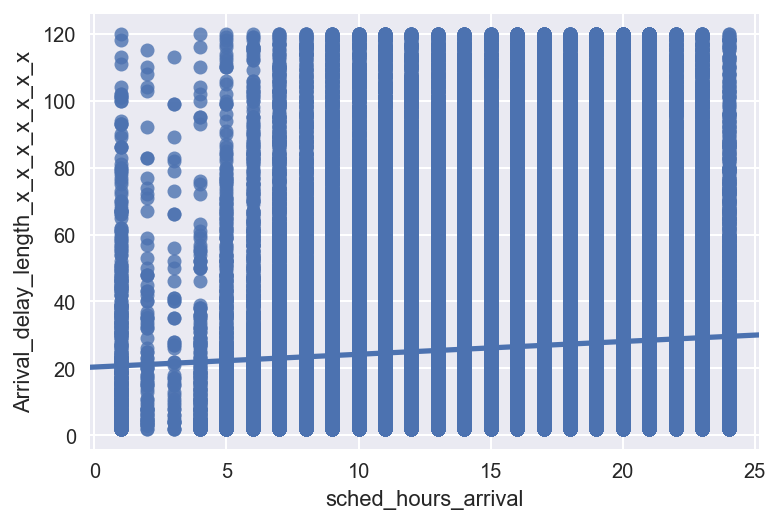

In [162]:
sns.regplot(df.sched_hours_arrival, df.Arrival_delay_length_x_x_x_x_x_x_x)

In [163]:
# Chech corelation between categorical hours on arrival vs arrival delay length
# ________________________________________________________
df[['sched_hours_arrival', 'Arrival_delay_length_x_x_x_x_x_x_x']].corr()

,sched_hours_arrival,Arrival_delay_length_x_x_x_x_x_x_x
sched_hours_arrival,1.000000,0.069981
Arrival_delay_length_x_x_x_x_x_x_x,0.069981,1.000000


<img src="img/lin.jpg">

# <span style="color:#ffad01">11. Predictor: <span style="color:#004577">Scheduled Length of Flight Time.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">As it is continuous variable I will keep it as it is.

In [164]:
df['sched_time_duration'] = df['SCHEDULED_TIME'].apply(lambda x: int(x) )
df.head(3)

,DAY_OF_WEEK,AIRLINE_CODE,TAIL_NUMBER,FLIGHT_NUMBER,ORIGIN_AIRPORT,CITY_ORIGIN,STATE_ORIGIN,DESTINATION_AIRPORT,STATE_DESTINATION,SCHEDULED_DEPARTURE,...,days_length_del,airline_del_mean,tail_del_mean,flight_del_mean,orig_airport_del_mean,orig_state_del_mean,dest_state_del_mean,sched_hours_depart,sched_hours_arrival,sched_time_duration
0,1,EV,N614QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-08 09:43:00,...,7.0,4,2,1,2,3,2,9,11,92
1,2,EV,N611QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-16 09:43:00,...,6.0,4,2,1,2,3,2,9,11,92
2,1,EV,N614QX,2856,BTR,Baton Rouge,LA,DFW,TX,2018-01-29 08:05:00,...,7.0,4,2,1,2,3,2,8,9,94


<img src="img/lin.jpg">

# <span style="color:#ffad01">12. Predictor: <span style="color:#004577">Distance of the Flight.

In [165]:
time_delays_by_distance = df.pivot_table(index='DISTANCE', values='Arrival_delay_length_x_x_x_x_x_x_x', aggfunc='mean')
df_xxx = pd.DataFrame(time_delays_by_distance)
df_xxx.reset_index(level=0, inplace=True)
df_xxx.head(5)

,DISTANCE,Arrival_delay_length_x_x_x_x_x_x_x
0,31.0,19.416667
1,66.0,45.348837
2,67.0,36.485380
3,68.0,48.166667
4,69.0,35.823529


In [166]:
df_xxx.describe()

,DISTANCE,Arrival_delay_length_x_x_x_x_x_x_x
count,1389.000000,1389.000000
mean,1054.351332,25.715920
std,749.952643,7.082676
min,31.000000,3.666667
25%,486.000000,21.690141
50%,901.000000,25.381250
75%,1447.000000,29.129032
max,4983.000000,85.500000


In [167]:
df_xxx['distance_del_mean'] =  df_xxx['Arrival_delay_length_x_x_x_x_x_x_x'].apply(lambda x: 1 if x > 3 and x <= 24 else int(x))
df_xxx['distance_del_mean'] =  df_xxx['distance_del_mean'].apply(lambda x: 2 if x > 24 and x <= 45 else int(x))
df_xxx['distance_del_mean'] =  df_xxx['distance_del_mean'].apply(lambda x: 3 if x > 45 and x <= 66 else int(x))
df_xxx['distance_del_mean'] =  df_xxx['distance_del_mean'].apply(lambda x: 4 if x > 66 else int(x))
df_xxx['distance_del_mean'] =  df_xxx['distance_del_mean'].apply(lambda x: 1 if x == 24 else int(x))

In [168]:
df = pd.merge(df,df_xxx, on=['DISTANCE'])
df.drop('Arrival_delay_length_x_x_x_x_x_x_x_y', axis=1, inplace=True)

In [169]:
df.head(2)

,DAY_OF_WEEK,AIRLINE_CODE,TAIL_NUMBER,FLIGHT_NUMBER,ORIGIN_AIRPORT,CITY_ORIGIN,STATE_ORIGIN,DESTINATION_AIRPORT,STATE_DESTINATION,SCHEDULED_DEPARTURE,...,airline_del_mean,tail_del_mean,flight_del_mean,orig_airport_del_mean,orig_state_del_mean,dest_state_del_mean,sched_hours_depart,sched_hours_arrival,sched_time_duration,distance_del_mean
0,1,EV,N614QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-08 09:43:00,...,4,2,1,2,3,2,9,11,92,2
1,2,EV,N611QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-16 09:43:00,...,4,2,1,2,3,2,9,11,92,2


<img src="img/lin.jpg">

# <span style="color:#004577">Part D. Categorical Variables into Dummies. 

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Now all my categorical variables are ready. I do dummies features from them, and delete categorical variables as I dont need them anymore. I use get_dummies method from pandas library to get dummies. Also I set prefix to easy understanding later where this features come from.

In [170]:
#1
df = pd.concat([df, pd.get_dummies(df.days_length_del, drop_first=True, prefix='day_of_week')], axis=1)
df.drop('days_length_del', axis=1, inplace=True)
#2
df = pd.concat([df, pd.get_dummies(df.airline_del_mean, drop_first=True, prefix='airline_code')], axis=1)
df.drop('airline_del_mean', axis=1, inplace=True)
#3
df = pd.concat([df, pd.get_dummies(df.tail_del_mean, drop_first=True, prefix='flight_tail_group')], axis=1)
df.drop('tail_del_mean', axis=1, inplace=True)
#4
df = pd.concat([df, pd.get_dummies(df.flight_del_mean, drop_first=True, prefix='flight_number_group')], axis=1)
df.drop('flight_del_mean', axis=1, inplace=True)
#5
df = pd.concat([df, pd.get_dummies(df.orig_airport_del_mean, drop_first=True, prefix='origin_airport_group')], axis=1)
df.drop('orig_airport_del_mean', axis=1, inplace=True)
#6
df = pd.concat([df, pd.get_dummies(df.orig_state_del_mean, drop_first=True, prefix='state_orig')], axis=1) 
df.drop('orig_state_del_mean', axis=1, inplace=True)
#7
df = pd.concat([df, pd.get_dummies(df.dest_state_del_mean, drop_first=True, prefix='state_dest')], axis=1)
df.drop('dest_state_del_mean', axis=1, inplace=True)
#8
df = pd.concat([df, pd.get_dummies(df.sched_hours_depart, drop_first=True, prefix='time_dep_group')], axis=1)
df.drop('sched_hours_depart', axis=1, inplace=True)
#9
df = pd.concat([df, pd.get_dummies(df.sched_hours_arrival, drop_first=True, prefix='time_arr_group')], axis=1)
df.drop('sched_hours_arrival', axis=1, inplace=True)
#10
# df = pd.concat([df, pd.get_dummies(df.sched_time_del_mean, drop_first=True, prefix='sched_lenth_of_time')], axis=1)
# df.drop('sched_time_del_mean', axis=1, inplace=True)
#11
df = pd.concat([df, pd.get_dummies(df.distance_del_mean, drop_first=True, prefix='distanece_group')], axis=1)
df.drop('distance_del_mean', axis=1, inplace=True)

df.rename(columns={'Arrival_delay_length_x_x_x_x_x_x_x_x':'Arrival_delay_length'}, inplace=True)
df.head(3)

,DAY_OF_WEEK,AIRLINE_CODE,TAIL_NUMBER,FLIGHT_NUMBER,ORIGIN_AIRPORT,CITY_ORIGIN,STATE_ORIGIN,DESTINATION_AIRPORT,STATE_DESTINATION,SCHEDULED_DEPARTURE,...,time_arr_group_18,time_arr_group_19,time_arr_group_20,time_arr_group_21,time_arr_group_22,time_arr_group_23,time_arr_group_24,distanece_group_2,distanece_group_3,distanece_group_4
0,1,EV,N614QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-08 09:43:00,...,0,0,0,0,0,0,0,1,0,0
1,2,EV,N611QX,2815,BTR,Baton Rouge,LA,DFW,TX,2018-01-16 09:43:00,...,0,0,0,0,0,0,0,1,0,0
2,1,EV,N614QX,2856,BTR,Baton Rouge,LA,DFW,TX,2018-01-29 08:05:00,...,0,0,0,0,0,0,0,1,0,0


<img src="img/lin.jpg">

# <span style="color:#004577">Part E. Check for Multicollinearity.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I have to check if my predictors variables are correlated among themselves. Multicollinearity doesn't change the predictive power of the models (at least, on the training data) but it does screw with our coefficient estimates. I will count as multicollinearity everything correlation more than 0.75. I have 604 columns of my predictors. Also as I have only 74 predictors I can plot it on Heatmap. 

In [171]:
check_mc = df.iloc[:, 22:]
check_mc.head(2)

,sched_time_duration,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,day_of_week_7.0,airline_code_2,airline_code_3,airline_code_4,...,time_arr_group_18,time_arr_group_19,time_arr_group_20,time_arr_group_21,time_arr_group_22,time_arr_group_23,time_arr_group_24,distanece_group_2,distanece_group_3,distanece_group_4
0,92,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,92,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [172]:
check_corr = check_mc.corr()

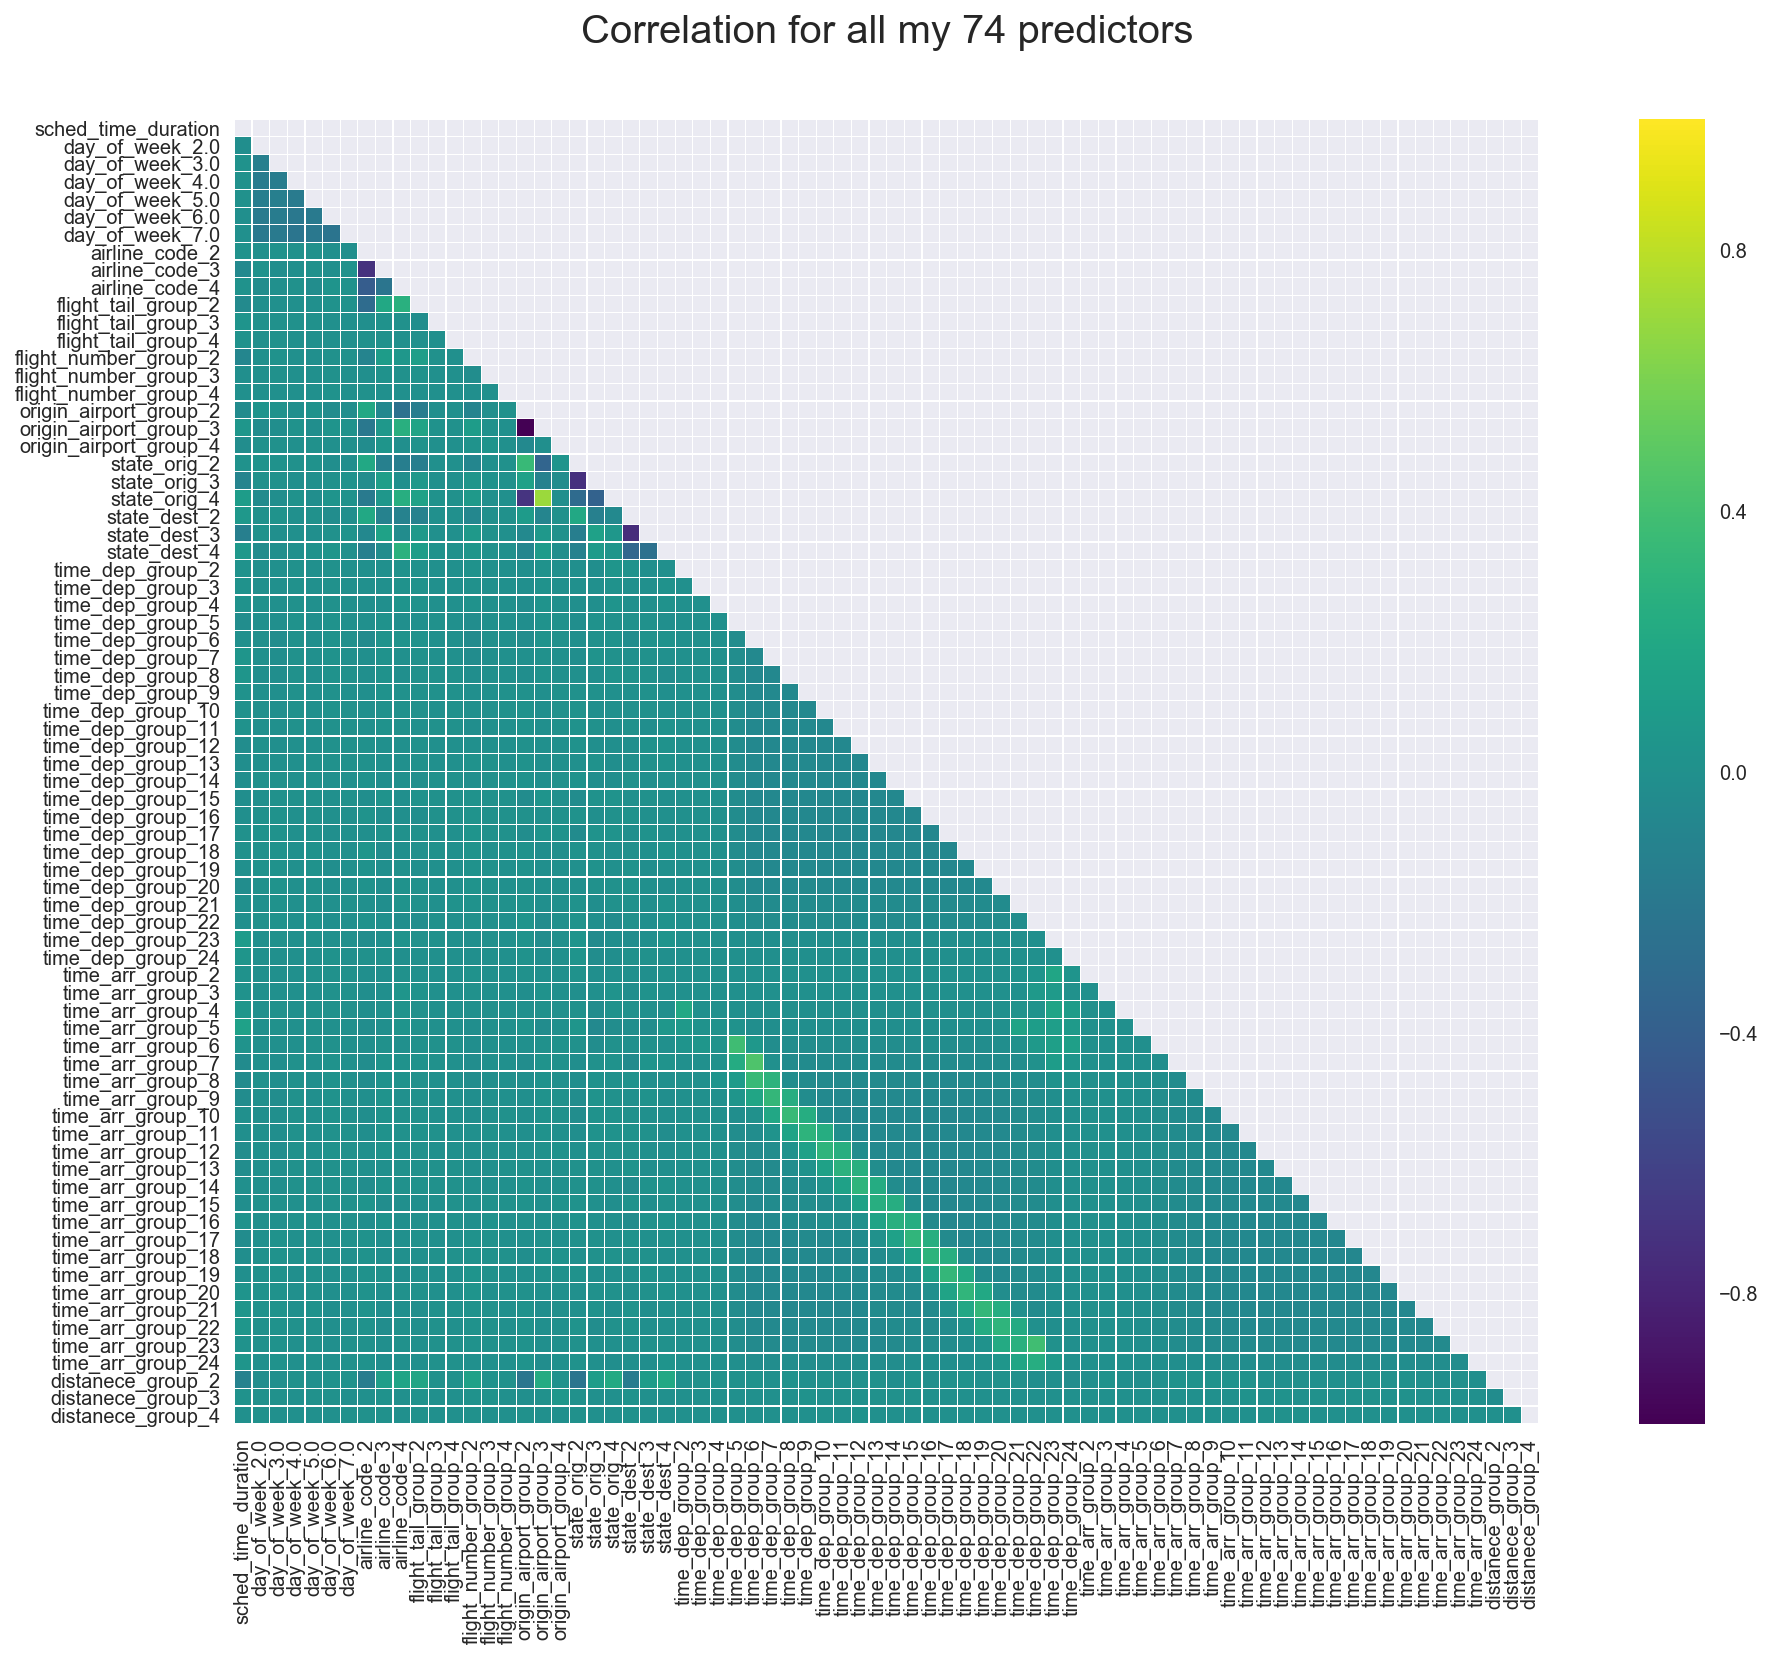

In [173]:
colormap = plt.cm.viridis
fix, ax = plt.subplots(figsize = (18,12))

mask = np.zeros_like(check_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Correlation for all my 74 predictors', y=1.05, size = 20)
ax = sns.heatmap(check_corr, 
            mask=mask,
            linewidths=0.1, 
            center = 0,
            vmin = -1,
            vmax = 1, 
            annot = False,
            square = True,
            fmt ='.2f', 
            annot_kws = {'size': 10},
            cmap = colormap, 
            linecolor ='white')

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I see on heatmap and my my function that I have two highly correlated pairs which one I will remove in next step.

In [174]:
def corrank(X):
        df_corr2 = pd.DataFrame([[(i,j),X.loc[i,j]] for i,j in list(itertools.combinations(X, 2))],columns=['pairs','corr'])    
        print(df_corr2.sort_values(by='corr',ascending=False))

corrank(check_corr)

                                                 pairs      corr
1108            (origin_airport_group_3, state_orig_4)  0.702254
1734              (time_dep_group_6, time_arr_group_7)  0.442781
2318            (time_dep_group_22, time_arr_group_23)  0.383343
1689              (time_dep_group_5, time_arr_group_6)  0.380489
1050            (origin_airport_group_2, state_orig_2)  0.350671
1735              (time_dep_group_6, time_arr_group_8)  0.346674
1822             (time_dep_group_8, time_arr_group_10)  0.346247
1779              (time_dep_group_7, time_arr_group_9)  0.326341
2164            (time_dep_group_17, time_arr_group_19)  0.323090
2229            (time_dep_group_19, time_arr_group_21)  0.320526
2095            (time_dep_group_15, time_arr_group_17)  0.311284
2197            (time_dep_group_18, time_arr_group_20)  0.308949
1984            (time_dep_group_12, time_arr_group_14)  0.301264
2260            (time_dep_group_20, time_arr_group_22)  0.300652
1905            (time_dep

<img src="img/lin.jpg">

# <span style="color:#004577">Part F. Models Building.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">In this part I will build my model to solve my regression problem in predicting length of delay. At the first stage I will use LinearRegression model.

# <span style="color:#ffad01">1. Separation: <span style="color:#004577">Features and Target Splitting.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I use iloc to slice my dataset by index. I put my predictors into "features" variable and my target I keep separate. Also I will drop highly correlated features to prevent multicollinearity.

In [175]:
features = df.iloc[:, 22:]
features.drop(['origin_airport_group_2', 'state_dest_2'], axis=1, inplace=True)
features.head(2)

,sched_time_duration,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,day_of_week_7.0,airline_code_2,airline_code_3,airline_code_4,...,time_arr_group_18,time_arr_group_19,time_arr_group_20,time_arr_group_21,time_arr_group_22,time_arr_group_23,time_arr_group_24,distanece_group_2,distanece_group_3,distanece_group_4
0,92,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,92,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [176]:
target = df.iloc[:, 21:22]
target.head(2)

,Arrival_delay_length
0,61
1,3


In [177]:
# Check shape of my slises.
# ________________________________________________________
features.shape, target.shape

((157948, 72), (157948, 1))

<img src="img/lin.jpg">

# <span style="color:#ffad01">2. Standardization: <span style="color:#004577">All data into same scale.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I use <b>StandardScaler</b> from sklearn library for my features standardization. The idea behind StandardScaler is that it will transform my data such that its distribution will have a mean value 0 and standard deviation of 1. The scaler instance can then be used on new data to transform it the same way it did on the training set. I will save all my standardized values in featuresS variable.

In [178]:
ss = StandardScaler()
featuresS = ss.fit_transform(features)

In [179]:
print('features: ',featuresS.shape)
print('target: ',target.shape)

features:  (157948, 72)
target:  (157948, 1)


<img src="img/lin.jpg">

# <span style="color:#ffad01">3. Split: <span style="color:#004577">Train | Test.

<img src="img/split.png">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I use <b>Train_test_split</b> from sklearn liberary for splitting my data. It is split arrays or matrices into random train and test subsets. I passing my features and target variables into train_test_split and set <b>Test_size</b> 0.25 which is means, my train subset will be 75% of all my data and 25% will be deferred selection or testing part. <b>Stratify</b> parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify. And I set <b>Random_state</b> which I use for the same split each time I run line of this code. Also I transformed my y_test and y_train into 1D format.

In [180]:
X_train, X_test, y_train, y_test = train_test_split(featuresS, target, test_size=0.25, stratify=target, random_state=21)

In [181]:
# Check shape for new splits. 
# ________________________________________________________
print('------------------------------')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('------------------------------')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
print('------------------------------')

------------------------------
X_train shape:  (118461, 72)
y_train shape:  (118461, 1)
------------------------------
X_test shape:  (39487, 72)
y_test shape:  (39487, 1)
------------------------------


In [182]:
# From 2D to 1D
# ________________________________________________________
yt = y_train.values
ytst = y_test.values

<img src="img/lin.jpg">

# <span style="color:#ffad01">4. Model: <span style="color:#004577">LinearRegression.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I will try to find best hyperparameters for my LinearRegression using GridSearch. And I will fit my model and check what score can I get with this predictors. 

# <span style="color:#7f7053">- GridSearch for LinearRegression.

In [72]:
parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False]}

grid = GridSearchCV(LinearRegression(),parameters, cv=10)
grid.fit(X_train, yt)

print("Best Hyper Parameters:\n",grid.best_params_)

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': True, 'normalize': True}


# <span style="color:#7f7053">- Fit Best Parameters into my Model.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I found optimal parameters for my LiearRegression:<b>{'copy_X': True, 'fit_intercept': True, 'normalize': True}</b>. I got model <b>score 0.1027</b> which is low, and I don't think there is a way to get much bigger score for LinearRegression with that predictors I got. I will use different approach in next chapter.

In [73]:
model = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

In [88]:
# Check score with cross validation using 10 folds
# ________________________________________________________
linreg_scores = cross_val_score(model, X_train, yt, cv=10)

print(linreg_scores)
print(np.mean(linreg_scores))

[ 0.10285598  0.09958359  0.09646694  0.09435438  0.10348805  0.10594938
  0.10425572  0.09984981  0.09874662  0.11488317]
0.102043361715


In [74]:
model.fit(X_train, yt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [75]:
model.score(X_train, yt)

0.10320801214438124

In [77]:
model.score(X_test, ytst)

0.10273003336403053

<img src="img/lin.jpg">

# <span style="color:#ffad01">5. Model: <span style="color:#004577">Ridge regression R2

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I used Ridge regresion and got the same score as LinearRegression.

# <span style="color:#7f7053">- Find an optimal value for Ridge regression alpha using RidgeCV.

In [89]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, yt)

print(optimal_ridge.alpha_)

731.680714343


# <span style="color:#7f7053">- Cross-validate the Ridge Regression R2.

In [91]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_test, ytst, cv=15)

print(ridge_scores)
print(np.mean(ridge_scores))

[ 0.10849985  0.12064969  0.09100556  0.10559894  0.09761083  0.0929081
  0.09247681  0.11356118  0.1026295   0.09152395  0.10254901  0.12358315
  0.09635299  0.07902415  0.09882918]
0.101120192869


In [92]:
optimal_ridge.score(X_test, y_test)

0.10272298651166432

<img src="img/lin.jpg">

# <span style="color:#ffad01">6. Model: <span style="color:#004577">Lasso Regression.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">Lasso deals primarily with the feature selection of valuable variables, eliminating ones that are not useful. This also takes care of multicollinearity, but in a different way: it will choose the "best" of the correlated variables and zero-out the other redundant ones. There may also be useless variables in the data which it is simply getting rid of entirely. I used Lasso regresion and got same <b>result 0.1027.</b>

# <span style="color:#7f7053">- Find an optimal value for Lasso regression alpha using LassoCV.

In [94]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, yt)

print(optimal_lasso.alpha_)

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00579476543749


# <span style="color:#7f7053">- Cross-validate the Lasso Regression.

In [96]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_test, y_test, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[ 0.10858643  0.10506897  0.09466137  0.10194492  0.1026576   0.10212376
  0.10592197  0.1072231   0.08935749  0.09298731]
0.101053292065


In [97]:
optimal_lasso.score(X_test, y_test)

0.10273992597757475

<img src="img/lin.jpg">

# <span style="color:#ffad01">7. Model: <span style="color:#004577">Elastic Net Regression.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I will use Elastic Net Regression it is combination of Ridge and Lasso. And I got result for Elastic Net 0.1027

# <span style="color:#7f7053">- Find an optimal value for Elastic Net regression alpha using ElasticNetCV.

In [101]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose=1)
optimal_enet.fit(X_train, yt)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00579476543749
1.0


# <span style="color:#7f7053">- Cross-validate the ElasticNet R2

In [102]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet_scores = cross_val_score(enet, X_test, ytst, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[ 0.10858643  0.10506897  0.09466137  0.10194492  0.1026576   0.10212376
  0.10592197  0.1072231   0.08935749  0.09298731]
0.101053292065


In [103]:
optimal_enet.score(X_test, y_test)

0.10273992597757475

<img src="img/lin.jpg">

# <span style="color:#ffad01">8. Model: <span style="color:#004577">RandomForestRegressor.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">I have tried to use RandomForestRegressor as my previous models does not perform well, but result for the RandomForestRegressor is even bit lower than from previous models.

# <span style="color:#7f7053">- GridSearch for RandomForestRegressor.

In [201]:
%%time
params = {'criterion':['mse'],
          'n_estimators':[41, 51, 61],
          'min_samples_leaf':[1,2],
          'min_samples_split':[2, 3],
          'max_features':['auto', 'sqrt'],
          'max_depth':[9, 10, 11],
          'random_state':[123]}
#Making models with hyper parameters sets
Rforest_gs = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=2, verbose=1)
Rforest_gs.fit(X_train, yt.ravel())
print(Rforest_gs.best_params_)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 21.6min finished


{'criterion': 'mse', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 61, 'random_state': 123}
CPU times: user 22min 7s, sys: 4.89 s, total: 22min 12s
Wall time: 22min 14s


# <span style="color:#7f7053">- Fit Best Parameters into my Model.

In [206]:
regr = RandomForestRegressor(criterion='mse', max_depth=9, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=61,  random_state=123)
regr.fit(X_train, yt.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [207]:
regr.score(X_test, ytst)

0.10046330548755034

<img src="img/lin.jpg">

<img src="img/conc.jpg">

<span style="color:#610023">In this part I used 5 regression models such as <b>LinearRegression, Ridge regression, Lasso Regression, Elastic Net Regression, RandomForestRegressor</b>. Regression regularization methods(Lasso, Ridge and ElasticNet) works well in case of high dimensionality and multicollinearity among the variables in the data set. They works by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. In all cases my score is not big, around <b>0.10</b>. I can make conclussion that my predictors in this case not god enought ore the regression problem,  probably I could try to add 1 more predictor such a length of the time on departure, as we are interesting in delays on arrivals. But this information we could get only after the plane took off the runway. As I'm focusing on features only given before plane start moving from the gate, I will leave everything as it is. And in next chapter I will try to find intervalse of flight delays solving <b>MultiClassification problem.</b>

<img src="img/lin.jpg">

[GO NEXT >>](./Chapter-4-classification_problem_timeinterval.ipynb)

[GO BACK <<](./Chapter-2-features-creation-classification problem.ipynb)